<a href="https://colab.research.google.com/github/Yeeun00/study1/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [4]:
# load data
X,y = make_moons(n_samples = 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

In [6]:
print(X.shape, y.shape)

(100, 2) (100,)


In [7]:
# train model
model = RandomForestClassifier(n_estimators=5, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [8]:
model.estimators_
# 학습 후 생성된 랜덤포레스트 내부트리는 estimator_ 속성에 저장됨

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315)]

In [10]:
!pip install mglearn

     |████████████████████████████████| 540 kB 4.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=e671e75d482a32c916ff2f15efdf3fb4f458fa7ee4b898dcb76cdc705ac3c84f
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [11]:
import matplotlib.pyplot as plt
import mglearn

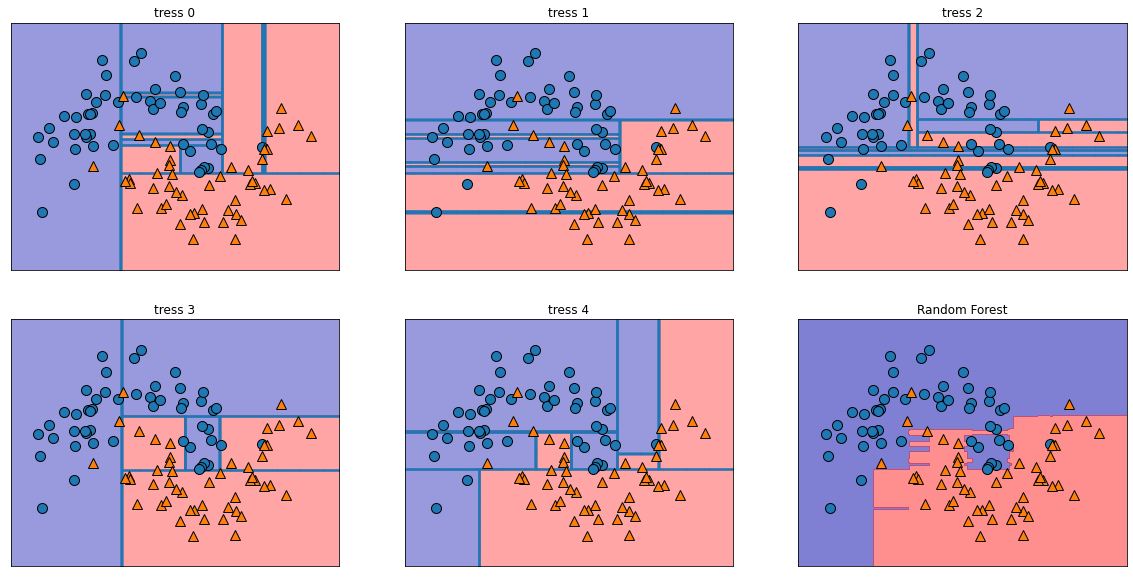

In [15]:
# 결정 경계 시각화
# 다섯 개의 결정트리 결정 단계
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), model.estimators_)):
  ax.set_title("tress {}".format(i))
  mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

# randomforest로 만들어진 결정경계
axes[-1,-1].set_title("Random Forest")
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.5, ax=axes[-1,-1])
mglearn.discrete_scatter(X[:,0], X[:,1],y)


In [16]:
# 각 트리들의 특성을 기반으로 랜덤포레스트는 덜 과적합된 좋은 결정경계를 그리고 있음을 알 수 있음
# 실제의 경우 더 많은 트리(수백-수천)를 사용하기 때문에 훨씬 부드럽고 합리적인 결정경계를 그려냄

**oob_score**

---


out-of-bag의 약자로, 부트스트랩 샘플링 시 선택되지 않은 샘플을 뜻함.       oob_score를 true로 하면 훈련 종료 후 oob샘플을 기반으로 평가를 수행함

In [19]:
# 모델학습
model = RandomForestClassifier(n_estimators=10, random_state=0, max_features=2, oob_score=True)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(max_features=2, n_estimators=10, oob_score=True,
                       random_state=0)

In [20]:
#평가
print("훈련 세트 정확도 : {}" .format(model.score(X_train, y_train)))
print("테스트 세트 정확도 : {}" .format(model.score(X_test, y_test)))
print("OOB샘플의 정확도 : {}" .format(model.oob_score_))

훈련 세트 정확도 : 0.9733333333333334
테스트 세트 정확도 : 0.96
OOB샘플의 정확도 : 0.8133333333333334
